Normalisasi Kata Typo

In [18]:
import pandas as pd

In [19]:
# Contoh DataFrame (asumsi dari hasil scraping dan case folding)
data = {'ulasan_casefold': [
    'tapi overall ini bagus bgt sumpah!!',
    'ga tau knp, padahal wifiku udah lancar.',
    'jujur agak kesel sih... kalo ada komik favorite.',
    'mantaappp bangettt'
]}
df = pd.DataFrame(data)

#Kamus Normalisasi (Typo, Singkatan, Gaul)
typo_dict = {
    'bgt': 'banget',
    'ga': 'tidak',
    'knp': 'kenapa',
    'kalo': 'kalau',
    'mantaappp': 'mantap', # Menangani typo berulang yang spesifik
    'bangettt': 'banget',
    'fav': 'favorit',
    'wifi': 'internet' # Contoh mengubah kata teknis ke bahasa umum
}

In [20]:
#Fungsi Normalisasi
def normalize_typo(text):
    """
    Mengganti kata-kata dalam teks berdasarkan kamus typo_dict.
    """
    if pd.isna(text):
        return text # Mengabaikan nilai NaN

    # Memisahkan teks menjadi kata-kata
    words = text.split()

    # Mengganti kata berdasarkan kamus
    normalized_words = [typo_dict.get(word, word) for word in words]

    # Menggabungkan kembali kata-kata menjadi string
    return ' '.join(normalized_words)

In [21]:
#Terapkan Fungsi ke Kolom DataFrame
df['ulasan_normalized_typo'] = df['ulasan_casefold'].apply(normalize_typo)

# Tampilkan hasilnya
print("--- Hasil Normalisasi Typo ---")
print(df[['ulasan_casefold', 'ulasan_normalized_typo']])

--- Hasil Normalisasi Typo ---
                                    ulasan_casefold  \
0               tapi overall ini bagus bgt sumpah!!   
1           ga tau knp, padahal wifiku udah lancar.   
2  jujur agak kesel sih... kalo ada komik favorite.   
3                                mantaappp bangettt   

                              ulasan_normalized_typo  
0             tapi overall ini bagus banget sumpah!!  
1         tidak tau knp, padahal wifiku udah lancar.  
2  jujur agak kesel sih... kalau ada komik favorite.  
3                                      mantap banget  


In [22]:
#mengekspor dataset
df.to_csv("Normalisasi Kata Typo.csv", index=False, encoding='utf-8')

Normalisasi Kata Singkatan

In [23]:
import pandas as pd

In [24]:
# Contoh DataFrame (asumsi dari data yang sudah di case folding)
data = {'ulasan_casefold': [
    'bintang 5, tp anehnya, klo aku mau buka episode iklan, kdng lama.',
    'ga tau knp, pdhl wifi ku udah lancar.',
    'jujur agak kesel sih... kl ada komik favorite bgt.'
]}
df = pd.DataFrame(data)

#Kamus Normalisasi Kata Singkatan/Gaul
slang_dict = {
    'tp': 'tapi',
    'klo': 'kalau',
    'kdng': 'kadang',
    'ga': 'tidak',
    'knp': 'kenapa',
    'pdhl': 'padahal',
    'ku': 'aku',
    'udah': 'sudah',
    'sih': 'saja', # Contoh kata gaul yang dinormalisasi
    'kl': 'kalau',
    'bgt': 'banget',
    'overall': 'secara keseluruhan',
    'aja': 'saja'
}

In [25]:
#Fungsi Normalisasi
def normalize_slang(text):
    """
    Mengganti kata-kata dalam teks (singkatan/gaul) berdasarkan slang_dict.
    """
    if pd.isna(text):
        return text # Mengabaikan nilai NaN

    # Memisahkan teks menjadi kata-kata
    words = text.split()

    # Mengganti kata: jika ditemukan di slang_dict, pakai nilai (value); jika tidak, pakai kata asli
    normalized_words = [slang_dict.get(word, word) for word in words]

    # Menggabungkan kembali kata-kata menjadi string
    return ' '.join(normalized_words)

In [26]:
#Terapkan Fungsi ke Kolom DataFrame
df['ulasan_normalized_slang'] = df['ulasan_casefold'].apply(normalize_slang)

# Tampilkan hasilnya
print("--- Hasil Normalisasi Singkatan/Gaul ---")
print(df[['ulasan_casefold', 'ulasan_normalized_slang']])

--- Hasil Normalisasi Singkatan/Gaul ---
                                     ulasan_casefold  \
0  bintang 5, tp anehnya, klo aku mau buka episod...   
1              ga tau knp, pdhl wifi ku udah lancar.   
2  jujur agak kesel sih... kl ada komik favorite ...   

                             ulasan_normalized_slang  
0  bintang 5, tapi anehnya, kalau aku mau buka ep...  
1      tidak tau knp, padahal wifi aku sudah lancar.  
2  jujur agak kesel sih... kalau ada komik favori...  


In [27]:
#mengekspor dataset
df.to_csv("Normalisasi Kata Singkatan.csv", index=False, encoding='utf-8')

Normalisasi Kata Gaul

In [28]:
import pandas as pd

In [29]:
# Contoh DataFrame (asumsi dari data yang sudah di case folding)
data = {'ulasan_casefold': [
    'jujur agak kesel sih... kl ada komik fav bgt.',
    'ga tau kenapa, pdhl wifi ku udah lancar jaya.',
    'tapi overall ini bagus bgt sumpah!! lopeee terus webtoon!!!'
]}
df = pd.DataFrame(data)

#Kamus Normalisasi Kata Gaul/Singkatan
gaul_dict = {
    'sih': 'saja',      # Kata gaul
    'kl': 'kalau',      # Singkatan
    'fav': 'favorit',   # Singkatan
    'bgt': 'banget',    # Singkatan
    'ga': 'tidak',      # Singkatan/Gaul
    'pdhl': 'padahal',  # Singkatan
    'ku': 'aku',        # Singkatan
    'lopeee': 'suka',   # Kata gaul yang diekspresikan berlebihan
    'overall': 'secara keseluruhan', # Kata serapan/gaul
    'aja': 'saja',      # Singkatan
    'wifi': 'internet' # Contoh kata serapan
}

In [30]:
#Fungsi Normalisasi
def normalize_gaul(text):
    """
    Mengganti kata-kata gaul/singkatan dalam teks berdasarkan gaul_dict.
    """
    if pd.isna(text):
        return text

    # Memisahkan teks menjadi kata-kata
    words = text.split()

    # Mengganti kata: jika ditemukan di kamus, pakai nilai; jika tidak, pakai kata asli
    normalized_words = [gaul_dict.get(word, word) for word in words]

    # Menggabungkan kembali kata-kata menjadi string
    return ' '.join(normalized_words)

In [31]:
#Terapkan Fungsi ke Kolom DataFrame
df['ulasan_normalized_gaul'] = df['ulasan_casefold'].apply(normalize_gaul)

# Tampilkan hasilnya
print("--- Hasil Normalisasi Kata Gaul ---")
print(df[['ulasan_casefold', 'ulasan_normalized_gaul']])

--- Hasil Normalisasi Kata Gaul ---
                                     ulasan_casefold  \
0      jujur agak kesel sih... kl ada komik fav bgt.   
1      ga tau kenapa, pdhl wifi ku udah lancar jaya.   
2  tapi overall ini bagus bgt sumpah!! lopeee ter...   

                              ulasan_normalized_gaul  
0  jujur agak kesel sih... kalau ada komik favori...  
1  tidak tau kenapa, padahal internet aku udah la...  
2  tapi secara keseluruhan ini bagus banget sumpa...  


In [32]:
#mengekspor dataset
df.to_csv("Normalisasi Kata Gaul.csv", index=False, encoding='utf-8')

Normalisasi Kata Huruf Berulang

In [33]:
import re
import pandas as pd

In [34]:
# Contoh DataFrame (asumsi dari data yang sudah di case folding dan normalisasi lain)
data = {'ulasan_clean': [
    'tapi overall ini bagusss bangettt sumpah!!',
    'ga tau kenapaaa, padahal wifi ku udah lancar.',
    'jujur agak kesel sih... lopeee webtoon!!',
    'mantaappp bangettt'
]}
df = pd.DataFrame(data)

In [35]:
#Fungsi Normalisasi Huruf Berulang
def normalize_repeated_chars(text):
    """
    Mengganti 3 atau lebih huruf berulang berturut-turut dengan 2 huruf.
    Contoh: 'baangggeettt' -> 'baanggeett' (Langkah 1) -> 'banget' (setelah normalisasi kata gaul/typo)

    Catatan: Operasi ini efektif jika dikombinasikan dengan normalisasi kata gaul/typo.
    """
    if pd.isna(text):
        return text

    # Pola Regular Expression:
    # r'([a-z])\1{2,}'  : Mencari satu huruf ([a-z]), menangkapnya (Group 1: \1),
    #                     dan mencari kemunculannya 2 kali atau lebih setelahnya ({2,}).
    # r'\1\1'           : Mengganti kecocokan dengan hanya 2 kali huruf yang ditangkap.

    # Contoh: 'aaaat' menjadi 'aat', 'mantaappp' menjadi 'mantaapp'
    text = re.sub(r'([a-z])\1{2,}', r'\1\1', text)

    # Opsi lain (Jika ingin hanya menyisakan 1 huruf):
    # text = re.sub(r'([a-z])\1+', r'\1', text)
    # Contoh: 'aaat' menjadi 'at', 'mantaappp' menjadi 'mantap'

    return text

In [36]:
#Terapkan Fungsi ke Kolom DataFrame
df['ulasan_no_repeated'] = df['ulasan_clean'].apply(normalize_repeated_chars)

# Tampilkan hasilnya
print("--- Hasil Normalisasi Huruf Berulang ---")
print(df[['ulasan_clean', 'ulasan_no_repeated']])

--- Hasil Normalisasi Huruf Berulang ---
                                    ulasan_clean  \
0     tapi overall ini bagusss bangettt sumpah!!   
1  ga tau kenapaaa, padahal wifi ku udah lancar.   
2       jujur agak kesel sih... lopeee webtoon!!   
3                             mantaappp bangettt   

                             ulasan_no_repeated  
0      tapi overall ini baguss bangett sumpah!!  
1  ga tau kenapaa, padahal wifi ku udah lancar.  
2       jujur agak kesel sih... lopee webtoon!!  
3                              mantaapp bangett  


In [37]:
#mengekspor dataset
df.to_csv("Normalisasi Kata Huruf Berulang.csv", index=False, encoding='utf-8')

Hapus kata yang kurang dari 3 huruf

In [38]:
import pandas as pd

In [39]:
# Contoh DataFrame (asumsi dari data yang sudah dinormalisasi)
data = {'ulasan_normalisasi_akhir': [
    'bintang 5 tapi anehnya kalau aku mau buka episode yang iklan kadang lama',
    'tidak tahu kenapa padahal internet aku sudah lancar saja tapi tetap tidak bisa',
    'jujur agak kesel kalau ada komik favorit tapi pas mau lanjut tidak bisa'
]}
df = pd.DataFrame(data)

# Tentukan panjang minimum kata yang diizinkan
MIN_LENGTH = 3

In [40]:
#Fungsi Penghapusan Kata Pendek
def remove_short_words(text, min_len=MIN_LENGTH):
    """
    Menghapus kata-kata dalam teks yang panjangnya kurang dari MIN_LENGTH.
    """
    if pd.isna(text):
        return text

    # Memisahkan teks menjadi kata-kata
    words = text.split()

    # Memfilter kata-kata menggunakan list comprehension
    # Hanya menyertakan kata jika len(word) >= min_len
    filtered_words = [word for word in words if len(word) >= min_len]

    # Menggabungkan kembali kata-kata menjadi string
    return ' '.join(filtered_words)

In [41]:
#Terapkan Fungsi ke Kolom DataFrame
df['ulasan_final_clean'] = df['ulasan_normalisasi_akhir'].apply(remove_short_words)

# Tampilkan hasilnya
print("--- Hasil Penghapusan Kata Pendek ---")
print(f"Filter: Kata kurang dari {MIN_LENGTH} huruf dihapus.")
print(df[['ulasan_normalisasi_akhir', 'ulasan_final_clean']])

--- Hasil Penghapusan Kata Pendek ---
Filter: Kata kurang dari 3 huruf dihapus.
                            ulasan_normalisasi_akhir  \
0  bintang 5 tapi anehnya kalau aku mau buka epis...   
1  tidak tahu kenapa padahal internet aku sudah l...   
2  jujur agak kesel kalau ada komik favorit tapi ...   

                                  ulasan_final_clean  
0  bintang tapi anehnya kalau aku mau buka episod...  
1  tidak tahu kenapa padahal internet aku sudah l...  
2  jujur agak kesel kalau ada komik favorit tapi ...  


In [42]:
#mengekspor dataset
df.to_csv("Hapus kata yang kurang dari 3 huruf.csv", index=False, encoding='utf-8')

Freq Bigram

In [43]:
import pandas as pd
from nltk.util import ngrams
from collections import Counter

#Contoh DataFrame (Berdasarkan output 'ulasan_final_clean' dari cell 85) ---
data = {
    'ulasan_final_clean': [
        'bintang tapi anehnya kalau aku mau buka episod',
        'tidak tahu kenapa padahal internet aku sudah lancar',
        'jujur agak kesel kalau ada komik favorit tapi',
        'aplikasi ini bagus banget tapi sering error', # Tambahan ulasan untuk bigram yang lebih bervariasi
        'kalau buka episod suka lama padahal internet cepat'
    ]
}
df = pd.DataFrame(data)

In [44]:
#Menggabungkan dan Menghilangkan Nilai Kosong ---
# Gabungkan semua teks menjadi satu string
all_text = ' '.join(df['ulasan_final_clean'].astype(str))

# Pisahkan teks menjadi daftar kata (tokenisasi sederhana)
words = all_text.split()

In [45]:
#Membuat Bigram ---
bigrams = list(ngrams(words, 2))

In [46]:
#Menghitung Frekuensi Bigram ---
bigram_freq = Counter(bigrams)

In [47]:
#Konversi ke DataFrame dan Menampilkan Hasil ---
df_bigram_freq = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frekuensi'])

# Urutkan berdasarkan Frekuensi secara menurun
df_bigram_freq = df_bigram_freq.sort_values(by='Frekuensi', ascending=False).reset_index(drop=True)

print("--- Frekuensi Bigram Teratas ---")
print(df_bigram_freq)

--- Frekuensi Bigram Teratas ---
                 Bigram  Frekuensi
0   (padahal, internet)          2
1        (buka, episod)          2
2       (bintang, tapi)          1
3       (tapi, anehnya)          1
4          (kalau, aku)          1
5      (anehnya, kalau)          1
6           (mau, buka)          1
7            (aku, mau)          1
8       (episod, tidak)          1
9         (tidak, tahu)          1
10       (tahu, kenapa)          1
11    (kenapa, padahal)          1
12      (internet, aku)          1
13         (aku, sudah)          1
14      (sudah, lancar)          1
15      (lancar, jujur)          1
16        (jujur, agak)          1
17        (agak, kesel)          1
18       (kesel, kalau)          1
19         (kalau, ada)          1
20         (ada, komik)          1
21     (komik, favorit)          1
22      (favorit, tapi)          1
23     (tapi, aplikasi)          1
24      (aplikasi, ini)          1
25         (ini, bagus)          1
26      (bagus, banget

Wordcloud

In [48]:
# Instalasi pustaka yang dibutuhkan jika belum terinstal
!pip install wordcloud matplotlib nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')

data = {
    'ulasan_final_clean': [
        'bintang tapi anehnya kalau aku mau buka episod',
        'tidak tahu kenapa padahal internet aku sudah lancar',
        'jujur agak kesel kalau ada komik favorit tapi',
        'aplikasi ini bagus banget tapi sering error',
        'kalau buka episod suka lama padahal internet cepat'
    ]
}
df = pd.DataFrame(data)

#Gabungkan semua teks menjadi satu string
all_text = ' '.join(df['ulasan_final_clean'].astype(str))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
#Hapus Stopwords ---
# Gunakan daftar stopwords bahasa Indonesia dari NLTK (atau daftar kustom)
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

# Tambahkan kata-kata yang mungkin sering muncul tapi tidak relevan
list_stopwords.extend(['bintang', 'lima', 'empat', 'tiga', 'dua', 'satu', 'aplikasi', 'mau', 'sudah'])

# Konversi daftar stopwords ke set untuk pencarian yang lebih cepat
set_stopwords = set(list_stopwords)

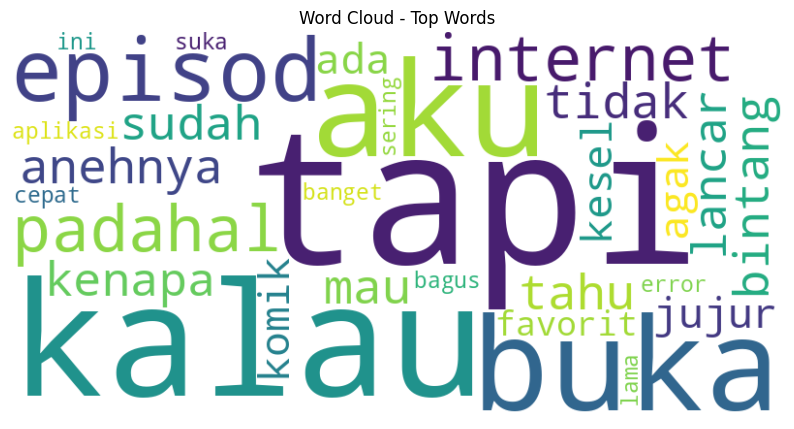

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800,height=400,background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Top Words')
plt.axis('off')
plt.show()